# Transfer Functions creation & manipulation.

Let's imagine a DC motor having the next block-diagram model :

![](./12_1_image1.png)

![](./12_1_image2.png)

Here are the parameters : 

- $R_a = 1,6 [Ohms]$
- $L_a = 32 [mH]$
- $K_{\phi} = 1,7 [Nm/A]$ or $[V/rad/s]$
- $J = 0,07 [kgm²]$
- $R_f = 0,16 [Nm/rad/s]$

You're asked to :

- Compute, using Matlab, the transfer function between the motor's speed $\omega$ and the voltage $U_a$
- Plot the speed evolution for 2.5 seconds, if the voltage $U_a$ is a ramp (with a slope of $40V/s$) during 1 second and then stays constant.
- Plot the poles of the transfer function in the complex plane

Solution :

$$ \frac{758.9}{s^2 + 52.29s + 1404} $$

In [6]:
import control as ct
import numpy as np
from matplotlib import pyplot as plt

# better plots
%config InlineBackend.figure_formats = ['svg']

In [7]:
Ra = 1.6
La = 0.032
Rf = 0.16
Kphi = 1.7
J = 0.07

In [8]:
Te = La/Ra
Te

0.02

In [9]:
Tm = J/Rf
Tm

0.43750000000000006

In [10]:
# Transfer Function computation
s = ct.tf('s')
assert s is not None
H1 = Kphi/(Ra+s*La)
H2 = 1/(s*J)
H3 = ct.minreal(H2/(1+H2*Rf))
H4 = H1*H3
H = H4/(1+H4*Kphi)
H = ct.minreal(H)

# Alternative
# H1 = Kphi*(1/Ra)/(1+s*La/Ra)
# H2 = (1/Rf)/(1+s*J/Rf)
# H3 = H1*H2
# H = ct.minreal(H1*H2/(1+H1*H2*Kphi))

H

1 states have been removed from the model
2 states have been removed from the model


TransferFunction(array([758.92857143]), array([1.00000000e+00, 5.22857143e+01, 1.40446429e+03]))

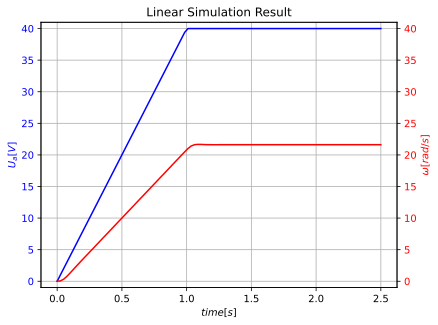

In [16]:
# time response
t = np.linspace(0, 2.5, 100)
u = 40 * t
u[t>1] = 40
_, out = ct.forced_response(H, t, u)

plt.figure()
plt.title('Linear Simulation Result')
plt.grid()
plt.xlabel("$time [s]$")
plt.ylabel("$U_a [V]$", color='b')
plt.yticks(color='b')
plt.ylim((-1, 41))
plt.plot(t, u, 'b')
plt.twinx()
plt.ylabel(r"$\omega [rad/s]$", color='r')
plt.yticks(color='r')
plt.ylim((-1, 41))
plt.plot(t, out, 'r')
plt.show()

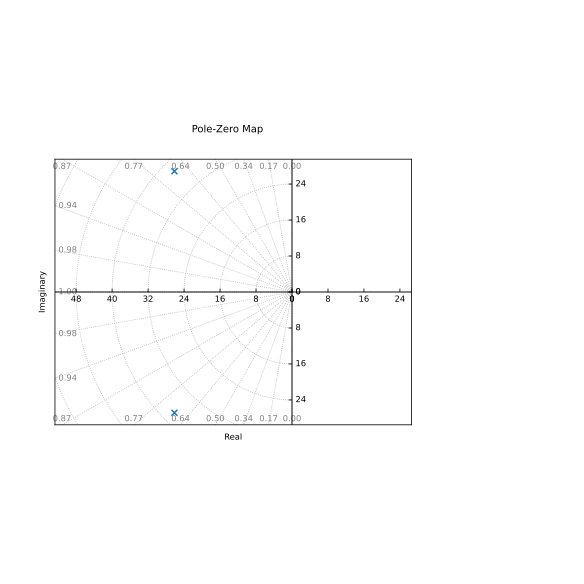

In [12]:
ct.pzmap(H, grid=True, title="Pole-Zero Map")
plt.show()

In [13]:
ct.poles(H)

array([-26.14285714+26.85172818j, -26.14285714-26.85172818j])